#**TEORÍA DE ESTABILIDAD**

In [67]:
#importamos las librerias TODAS TODAS TODAS XD
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt

**Actividad 1**

$$\frac{dx}{dt}=y$$

$$\frac{dy}{dt}=-x$$

In [68]:
#definimos una madtriz 
MA1 = np.array([[0,1],[-1,0]])

#calculamos los eigenvalores 
print(MA1)
eigvalsMA1, eigvecsMA1= la.eig(MA1)
print("los eigenvalores son:", eigvalsMA1)

#obtenemos la traza de la matriz 
tr = np.trace(MA1)
print("La traza de la matriz es:",tr)

[[ 0  1]
 [-1  0]]
los eigenvalores son: [0.+1.j 0.-1.j]
La traza de la matriz es: 0


In [69]:
#calculamos el punto critico y resolvemos el sistema homogeneo
A = np.zeros((2,1))
sh = la.solve(MA1,A)
print("la solución es:x =",sh[0], "y =",sh[1])

la solución es:x = [-0.] y = [0.]


Por lo que la solucion a traves de la transformada de Laplace 
$$ c_1 cos(t)+c_2sen(t)-c_1sen(t)+c_2cos(t)$$

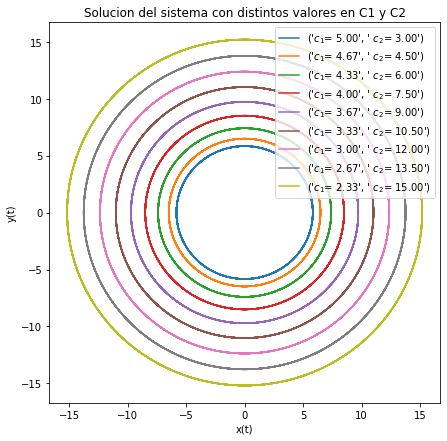

In [70]:
#graficamos las soluciones para las constantes c1 y c2. Y definimos la funcion solucion del sistema 
def xy(t,c1,c2):
  sol = [c1*np.cos(t)+c2*np.sin(t),-c1*np.sin(t)+c2*np.cos(t)]
  return sol

#definimos los limies 
t = np.linspace(0,50,1000)

c1=list(np.linspace(5,2,10))
c2=list(np.linspace(3,15,9))

plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=xy(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Solucion del sistema con distintos valores en C1 y C2')
plt.legend()
plt.show()

**Actividad 2**

$$\frac{dx}{dt}=y$$

$$\frac{dx}{dt}=x$$

In [71]:
#Hacemos practicamente lo mismo
#definimos una madtriz 
MA2 = np.array([[1,0],[0,1]])
print ("la segunda matriz es:")
print (MA2)
print()
#calculamos los eigenvalores 
#print(MA2)
eigvalsMA2, eigvecsMA2= la.eig(MA2)
print("los eigenvalores son:") 
print(eigvalsMA2)
print()
#obtenemos la traza de la matriz 
tr = np.trace(MA2)
print("La traza de la matriz es:",tr)
print()
#calculamos el determinante
detMA2=la.det(MA2)
print("el determinante es: ")
print(detMA2)
print()
print("la delta es:")
print((tr)**2-4*(detMA2))

la segunda matriz es:
[[1 0]
 [0 1]]

los eigenvalores son:
[1.+0.j 1.+0.j]

La traza de la matriz es: 2

el determinante es: 
1.0

la delta es:
0.0


la solucion del sistema es
$$c_1e^t-c_2e^{-t}c_1e^t+c_2e^{-t}$$

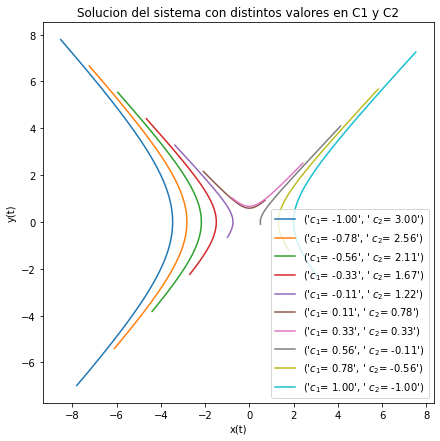

In [72]:
#graficamos las soluciones para las constantes c1 y c2. Y definimos la funcion solucion del sistema 
def xy_2(t,c1,c2):
  sol_2 = [c1*np.exp(t)-c2*np.exp(-t), c1*np.exp(t)+c2*np.exp(-t)]
  return sol_2

#definimos los limies 
t = np.linspace(-1,2,1000)

c1=list(np.linspace(-1,1,10))
c2=list(np.linspace(3,-1,10))

plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=xy_2(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Solucion del sistema con distintos valores en C1 y C2')
plt.legend()
plt.show()

**Actividad 3**

$$\frac{d^2}{dt^2}+w^2_0x = 0, w_0>0$$
de aqui hacemos
$$\frac{dx}{dt}= y$$
$$\frac{dy}{dt}=-w^2_0x0$$
por lo que los eigenvalores son:
$$\lambda= \pm w_0i$$

In [73]:
#Definimos el valor de la frecuencia natural
w_0 = 5
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
MA3=np.array([[0,1],[-w_0**2,0]])
eigval, eigvec = la.eig(MA3)
print('Eigenvalores')
print('λ1: ', eigval[0])
print('λ2: ', eigval[1])
print('Eigenvectores')
print('v1: ', eigvec[0])
print('v2: ', eigvec[1])


#Obtenemos el punto crítico 
M=np.zeros((2,1))
V_crit3=la.solve(MA3,M)
print('Punto crítico: ', V_crit3)

Eigenvalores
λ1:  5j
λ2:  -5j
Eigenvectores
v1:  [0.-0.19611614j 0.+0.19611614j]
v2:  [0.98058068+0.j 0.98058068-0.j]
Punto crítico:  [[-0.]
 [ 0.]]


la solucion del sistema es: 
$$c_1cos(w_0t)+c_2sen(w_0t)-c_1sen(w_0t) +c_2w_0cos(w_0t)$$

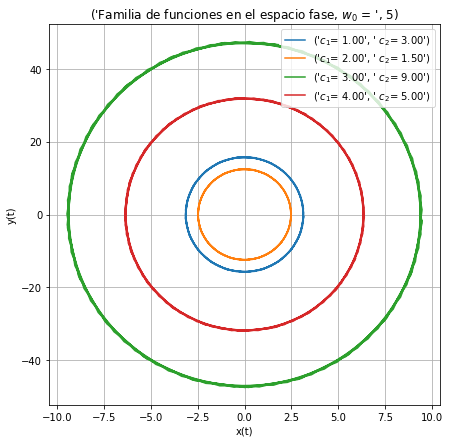

In [74]:
def xy_3(t,w_0,c1,c2):
  sol=[c1*np.cos(w_0*t)+c2*np.sin(w_0*t),-c1*w_0*np.sin(w_0*t)+c2*w_0*np.cos(w_0*t)]
  return sol

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase
t=np.linspace(-1,5,100)
c1=[1,2,3,4]
c2=[3,1.5,9,5]

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=xy_3(t,w_0,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(('Familia de funciones en el espacio fase, $w_0$ = ',w_0))
plt.legend(loc='best')
plt.grid()
plt.show()

**Actividad 4**

$$\frac{dx}{dt}= -2x$$
$$\frac{dy}{dt}= 2z$$
$$\frac{dz}{dt}= -2y$$

In [75]:
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
MA4 = np.array([[-2,0,0],[0,0,2],[0,-2,0]])
MA4_1= np.array([[0,-2],[2,0]])
eigenval, eigenvec = la.eig(MA4)
print(eigenval)
eigenval, eigenvec = la.eig(MA4_1)
print(eigenval)
tr = np.trace(MA4)
tr1 = np.trace(MA4_1)
print("La traza de la matriz 1 es:",tr)
print("La traza de la matriz 2 es:",tr1)


# Obtenemos los puntos críticos
ma4=np.zeros((3,1))
pc=la.solve(MA4,ma4)
pc

[ 0.+2.j  0.-2.j -2.+0.j]
[0.+2.j 0.-2.j]
La traza de la matriz 1 es: -2
La traza de la matriz 2 es: 0


array([[-0.],
       [-0.],
       [ 0.]])

la solucion del sistema es :
$$c_1exp(-2t),c_2cos(2t)+c_3sen(2t),-c_2sen(2t)+c_3cos(2t)$$

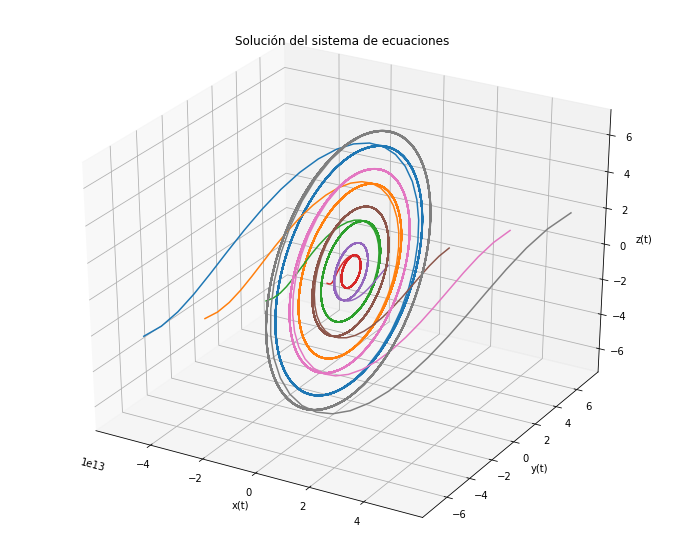

In [76]:
# Definimos la función con la solución del sistema, como se ve arriba
def xy_4(t,c1,c2,c3):
  sol=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return sol

t = np.linspace( -15, 80, 1000 )
#definimos las constantes 
c1 = np.linspace( -5,5,8 )
c2 = np.linspace(2,-1,8 )
c3 = np.linspace(-6,7,8)

plt.figure(figsize = ( 12, 10 ))
ax = plt.axes( projection= "3d" )

for a,b,c in zip(c1,c2,c3):
  v = xy_4(t,a,b,c)
  s = np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])

plt.xlabel("x(t)")
plt.ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solución del sistema de ecuaciones")
plt.grid()
plt.show()

**Actividad 5**

$$\frac{dx}{dt}= -x+z$$
$$\frac{dx}{dt}= -3y$$
$$\frac{dx}{dt}= -x-z$$

In [77]:
MA5 = np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
MA5_1= np.array([[-1,-1],[-1,-1]])
eigenval, eigenvec = la.eig(MA5)
print(eigenval)
eigenval, eigenvec = la.eig(MA5_1)
print(eigenval)
tr = np.trace(MA5)
tr1 = np.trace(MA5_1)
print("La traza de la matriz 1 es:",tr)
print("La traza de la matriz 2 es:",tr1)


# Obtenemos los puntos críticos
ma5=np.zeros((3,1))
pc=la.solve(MA5,ma5)
pc

[-1.+1.j -1.-1.j  3.+0.j]
[ 0.+0.j -2.+0.j]
La traza de la matriz 1 es: 1
La traza de la matriz 2 es: -2


array([[-0.],
       [ 0.],
       [-0.]])

la solucion del sistema es :
$$e^{-t}(c_1sen(t)+c_3cos(t))c_2e^{3t}e^{-t}(c_3sen(t)-c_1cos(t)$$

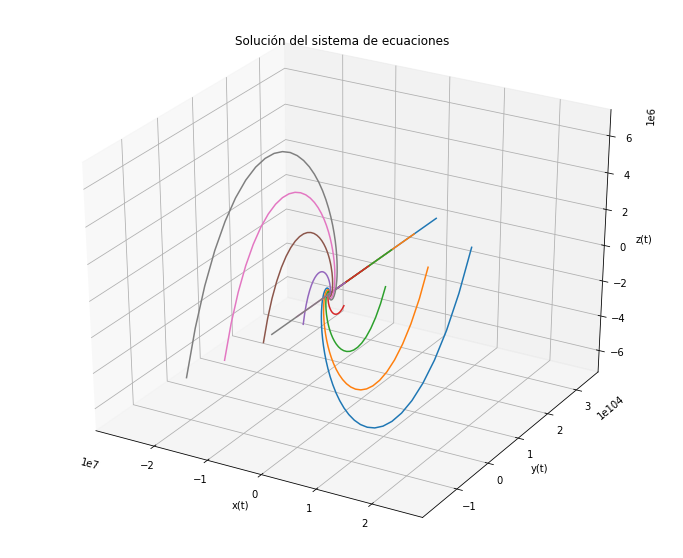

In [78]:
# Definimos la función con la solución del sistema, como se ve arriba
def xy_5(t,c1,c2,c3):
  sol=[np.exp(-t)*(c1*np.cos(t)+c3*np.sin(t)),c2*np.exp(3*t) ,np.exp(-t)*(c3*np.cos(t)-c1*np.sin(t))]
  return sol

t = np.linspace( -15, 80, 1000 )
#definimos las constantes 
c1 = np.linspace( -5,5,8 )
c2 = np.linspace(2,-1,8 )
c3 = np.linspace(-6,7,8)

plt.figure(figsize = ( 12, 10 ))
ax = plt.axes( projection= "3d" )

for a,b,c in zip(c1,c2,c3):
  v = xy_5(t,a,b,c)
  s = np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])

plt.xlabel("x(t)")
plt.ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solución del sistema de ecuaciones")
plt.grid()
plt.show()

**Actividad 6**
$$\frac{dx}{dt}= -x$$
$$\frac{dy}{dt}= x+2y$$
$$x(0)=0, y(0)=3$$

In [79]:
#Definimos la martrix 
MA_6 = np.array([[2,1],[1,1]])
eigenval_6, eigenvec_6= la.eig(MA_6)
print('Los eigenvalores son')
print(eigenval_6)
print()
print('Los eigenvectores correspondientes son')
print(eigenvec_6)

tr_6 = np.trace(MA_6)
print("La traza de la matriz A es:",tr)
Det_MA_6=la.det(MA_6)
print()
print('El determinante es')
print(Det_MA_6)
print()
print('Delta es =')
print((tr)**2-4*(Det_MA_6))
print()

Los eigenvalores son
[2.61803399+0.j 0.38196601+0.j]

Los eigenvectores correspondientes son
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]
La traza de la matriz A es: 1

El determinante es
1.0

Delta es =
-3.0



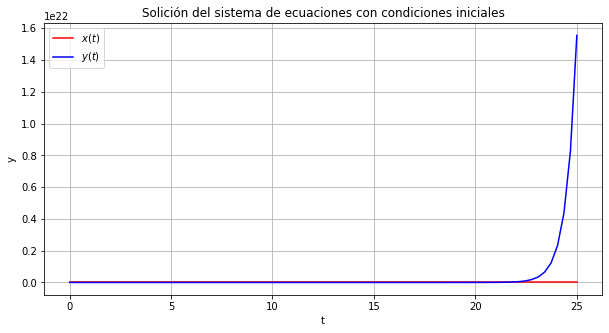

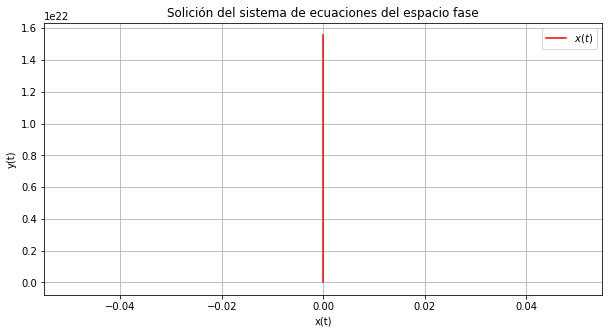

In [80]:
#definimos la funcion 
def xy_6(y, t):
  x, p = y
  return [-x, x+2*p]

#Condiciones iniciales 
y_0=[0,3] 
t=np.linspace(0,25,80)

# Grafica 1
plt.figure(figsize=(10,5))
y=odeint(xy_6,y_0,t)
plt.plot(t,y[0:,0],'red',label='$x(t)$')
plt.plot(t,y[0:,1],'blue',label='$y(t)$')
plt.title('Solición del sistema de ecuaciones con condiciones iniciales')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Grafica 2
plt.figure(figsize=(10,5))
plt.plot(y[0:,0],y[:,1],'red',label='$x(t)$')
plt.title('Solición del sistema de ecuaciones del espacio fase')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

**Actividad 7**

$$\frac{dx}{dt}= 2x+y$$
$$\frac{dy}{dt}= x+y$$
$$x(1)=1, y(1)=1$$

In [81]:
#Definimos la Matriz A 

MA_7 = np.array([[2,1], [1,1]])
print (MA_7)
print()
def xy_7(V, t=1):
    return np.array([ 2*V[0] + V[1] ,
                  V[0]+V[1]])
    
#Los puntos críticos del sistema
V_crit7 = np.array([     0. ,  0.])

print('Punto crítico:', V_crit7)
print(' ')
#En los puntos críticos se anulan las derivadas. 
all(xy_7(V_crit7) == np.zeros(2) )
                                
#Aplicamos la biblioteca scipy.linalg.eig()
eigenval_7, eigenvec_7 = linalg.eig(MA_7)
print('los eigenvaloreson:', eigenval_7)
print('los eigenvectores son:', eigenvec_7)

[[2 1]
 [1 1]]

Punto crítico: [0. 0.]
 
los eigenvaloreson: [2.61803399+0.j 0.38196601+0.j]
los eigenvectores son: [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [82]:
#para los os eigenvectores que son linealmente independientes hacemos 
lambda_1 = eigenval_7[0]
lambda_2 = eigenval_7[1]
print('los eigenvalores son:')
print('λ_1=', lambda_1)
print('λ_2=', lambda_2)
print(' ')
print('los eigenvectores son:')
v_1 = eigenvec_7[:,0]
v_2 = eigenvec_7[:,1]
print('v_1=',v_1)
print('v_2=',v_2)

los eigenvalores son:
λ_1= (2.618033988749895+0j)
λ_2= (0.3819660112501052+0j)
 
los eigenvectores son:
v_1= [0.85065081 0.52573111]
v_2= [-0.52573111  0.85065081]


<Figure size 432x288 with 0 Axes>

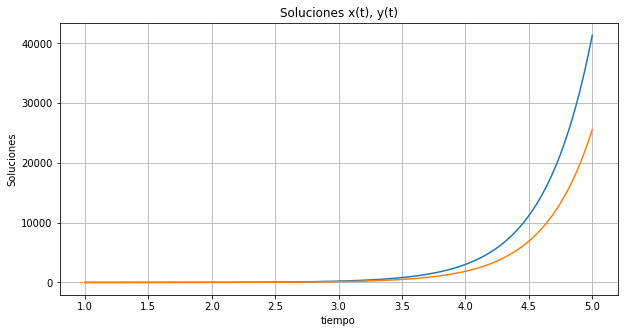

<Figure size 432x288 with 0 Axes>

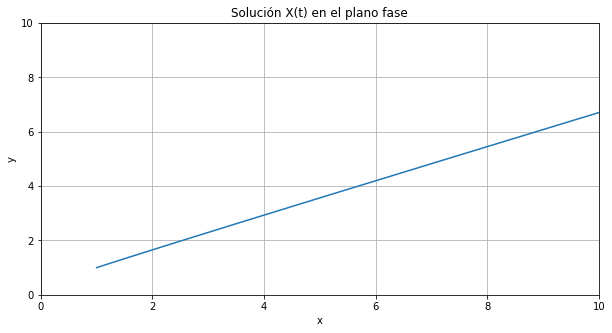

In [97]:
#Graficamos la solución
#Definimos el limite de integracion
t = np.linspace(1, 5,  500)           
V_0 = np.array([1, 1])                 
B, infodict = integrate.odeint(xy_7, V_0, t, full_output=True)
infodict['message']

x, y = B.T

#grafica 1
f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, label='x(t)');
plt.plot(t, y, label='y(t)');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t)');
plt.grid();
plt.show();

#grafica 2
f2 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase')
plt.grid()
plt.show()

**Actividad 8**
$$\frac{dx}{dt}=Ax$$
$$x(0)=0, (0,3)$$

In [98]:
#Definimos la matrix XD
MA_8=np.array([[0,3],[1,-2]])

print('La matriz A es: ')
print(MA_8)
print()

eigenval_8, eigenvec_8=la.eig(MA_8)
print('Los eigenvalores son:')
print(eigenval_8)
print()
print('Los vectores son:')
print(eigenvec_8)
print()
tr_8 = np.trace(MA_8)
print("La traza de la matriz A es:",tr_8)
print()
Det_MA_8=la.det(MA_8)
print('El determinante es', Det_MA_8)
print()
print('la delta es =', (tr_8)**2-4*(Det_MA_8))

print()

La matriz A es: 
[[ 0  3]
 [ 1 -2]]

Los eigenvalores son:
[ 1.+0.j -3.+0.j]

Los vectores son:
[[ 0.9486833  -0.70710678]
 [ 0.31622777  0.70710678]]

La traza de la matriz A es: -2

El determinante es -3.0

la delta es = 16.0



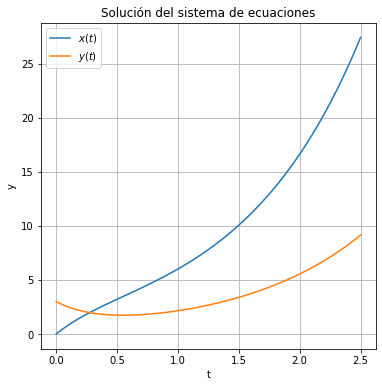

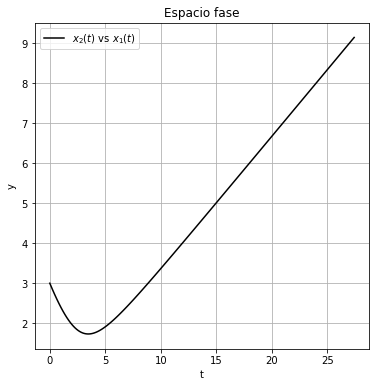

In [99]:
#Definimos la funcon 
def xy_8(y, t):
  x_1, x_2 = y
  return [ 3*x_2,x_1-2*x_2]

#declaramos las condiciones iniciales
y_0=[0,3]
t=np.linspace(0,2.5,100)

#Grafica 1
plt.figure(figsize=(6,6))
y=odeint(xy_8,y_0,t)
plt.plot(t,y[0:,0], label='$x(t)$')
plt.plot(t,y[0:,1], label='$y(t)$')
plt.title('Solución del sistema de ecuaciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Grafica 2
plt.figure(figsize=(6,6))
y=odeint(xy_8,y_0,t)
plt.plot(y[0:,0],y[0:,1],'k',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Espacio fase')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

**Acividad 9**
$$\frac{dx}{dt}=Ax$$
$$x(0)=(0,-b,b) $$

In [100]:
#Definimos la matrix 
MA_9 = np.array([[2,0,0],[0,-1,0],[0,2,-3]])
eigenval_9, eigenvec_9= la.eig(MA_9)
print("Los eigenvalores son:",eigenval_9 )
tr_9 = np.trace(MA_9)
print("La traza de la matriz A es:",tr_9)

Los eigenvalores son: [ 2.+0.j -3.+0.j -1.+0.j]
La traza de la matriz A es: -2


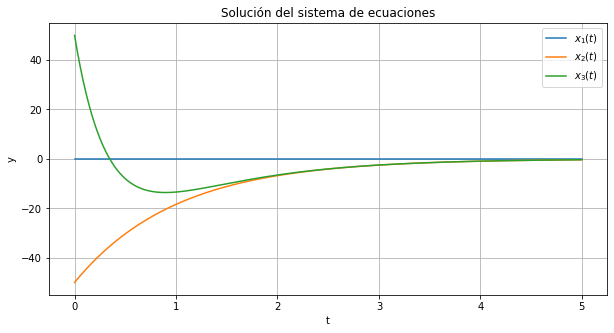

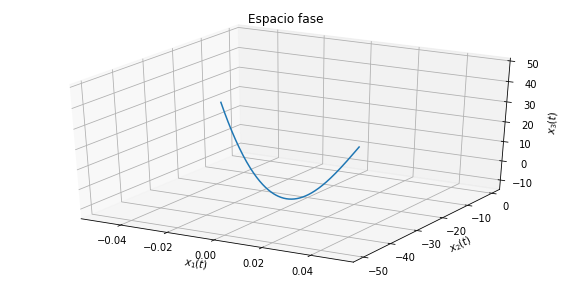

In [101]:

#Definimos la función 
def xy_9(y, t):
  x_1, x_2, x_3 = y
  return [ 2*x_1 , -x_2 , 2*x_2-3*x_3 ]

#Condiciones iniciales
b = 50
y_0 = [0,-b,b]
t=np.linspace(0,5,900)

plt.figure(figsize=(10,5))
y=odeint(xy_9,y_0,t)
plt.plot(t,y[0:,0],label='$x_1(t)$')
plt.plot(t,y[0:,1],label='$x_2(t)$')
plt.plot(t,y[0:,2],label='$x_3(t)$')
plt.title('Solución del sistema de ecuaciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase
plt.figure(figsize=(10,5))
ax=plt.axes(projection='3d')
ax.plot3D(y[0:,0],y[0:,1],y[0:,2])
ax.set_title('Espacio fase')
ax.set_xlabel('$x_1(t)$')
ax.set_ylabel('$x_2(t)$')
ax.set_zlabel('$x_3(t)$')
plt.grid()
plt.show()